In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Extract Zip file to local run time (to avoid wasting storage on drive)
!unzip -qq -n /content/drive/MyDrive/Data281Project/zipped_data.zip

,country-code,region-code,sub-region-code,intermediate-region-code,count
sub-region,,,,,
Northern America,1328.0,76.0,84.0,0.0,13410
Northern Europe,7078.0,2100.0,2156.0,830.0,5865
Western Europe,2840.0,1200.0,1240.0,0.0,5616
Latin America and the Caribbean,5950.0,304.0,6704.0,176.0,5202
Eastern Asia,2400.0,994.0,210.0,0.0,4805
Eastern Europe,3968.0,1200.0,1208.0,0.0,3578
South-eastern Asia,4234.0,1278.0,315.0,0.0,2777
Southern Europe,5571.0,1950.0,507.0,0.0,2757
Australia and New Zealand,590.0,18.0,106.0,0.0,2261


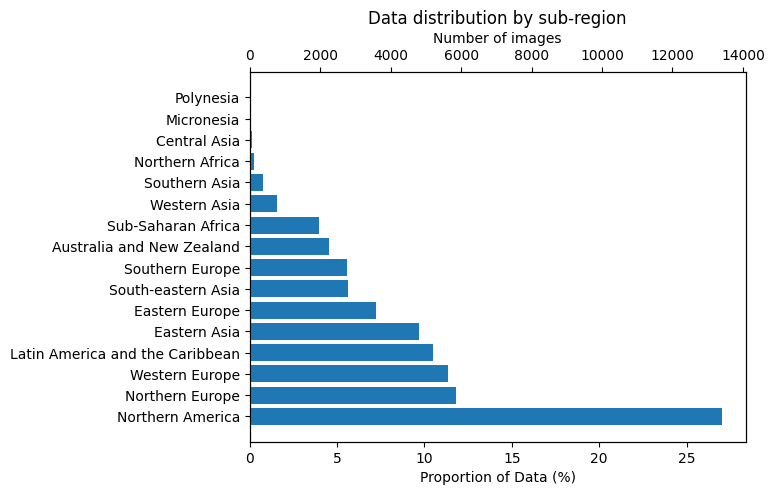

In [159]:
# Load the Continent mapping CSV
continents_path = '/content/drive/MyDrive/Data281Project/continents2.csv'
con_df = pd.read_csv(continents_path)
con_df.head()
con_df.set_index('name',inplace=True)

# Use the Kaggle dataset to find the number of image to find subregions
count_base = 'compressed_dataset/'
data_count = {}
img_path = os.listdir(count_base)

for country in img_path:
    num_count = len(os.listdir(count_base+country))
    data_count[str(country)] =num_count
country_name_count = pd.DataFrame(data={'count':data_count.values()},index = data_count.keys())

# Create the joined data frame
new_df = con_df.join(country_name_count,how='right')

# Group by region
gr_df = new_df.groupby(['sub-region']).sum('count').sort_values('count')[::-1]
display(gr_df)
fig,ax = plt.subplots(1,1)

ax.barh(gr_df.index,gr_df['count']/sum(gr_df['count'])*100)
ax.set_xlabel('Proportion of Data (%)')
ax2 = ax.twiny()
ax2.set_xlabel('Number of images')
ax2.barh(gr_df.index,gr_df['count'])
ax.set_title('Data distribution by sub-region')
fig.show()

,country-code,region-code,sub-region-code,intermediate-region-code,count
sub-region,,,,,
Northern America,1328.0,76.0,84.0,0.0,13410.0
Northern Europe,7078.0,2100.0,2156.0,830.0,5865.0
Western Europe,2840.0,1200.0,1240.0,0.0,5616.0
Latin America and the Caribbean,5950.0,304.0,6704.0,176.0,5202.0
Eastern Asia,2400.0,994.0,210.0,0.0,4805.0
Eastern Europe,3968.0,1200.0,1208.0,0.0,3578.0
South-eastern Asia,4234.0,1278.0,315.0,0.0,2777.0
Southern Europe,5571.0,1950.0,507.0,0.0,2757.0
Australia and New Zealand,590.0,18.0,106.0,0.0,2261.0


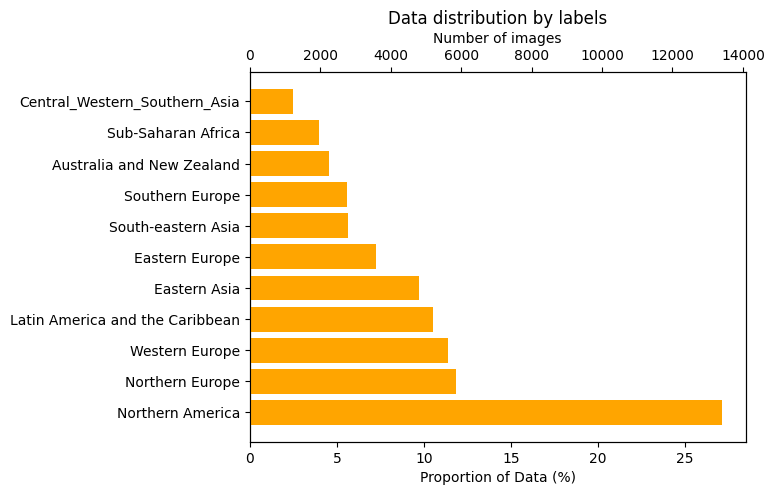

In [173]:
# Regroup Data
group_1 = ['Central Asia','Western Asia', 'Southern Asia']
drop_group = ['Polynesia','Micronesia','Northern Africa'] + group_1 # Dropping group 1 after aggregate
# Create copy of group dataframe
regr_df = gr_df.copy()

regr_df.loc['Central_Western_Southern_Asia'] = regr_df.loc[group_1].sum()
regr_df = regr_df.drop(drop_group)
display(regr_df)

fig,ax = plt.subplots(1,1)
ax.barh(regr_df.index,regr_df['count']/sum(regr_df['count'])*100,color='orange')
ax.set_xlabel('Proportion of Data (%)')
ax.set_title('Data distribution by labels')

ax2 = ax.twiny()
ax2.set_xlabel('Number of images')
ax2.barh(regr_df.index,regr_df['count'],color='orange')
fig.show()


In [163]:
# Create mapping from labels to country
original_subr = gr_df.index.to_list()
label_country = {}
for sr in original_subr:
    if sr in group_1:
        if sr in label_country.keys():
            label_country['Central_Western_Southern_Asia'] += list(new_df.index[new_df.loc[:,'sub-region']==sr])
        else:
            label_country['Central_Western_Southern_Asia'] = list(new_df.index[new_df.loc[:,'sub-region']==sr])
    elif sr in regr_df.index:
        label_country[sr] = list(new_df.index[new_df.loc[:,'sub-region']==sr])

# Create mapping from labels to image_path
label_img = {}
for label,country in label_country.items():
    label_img[label] = []
    for c in country:
        img_path = os.listdir(f'compressed_dataset/{c}')
        img_path = [f'compressed_dataset/{c}/'+i for i in img_path]
        label_img[label] += img_path

In [169]:
print(label_img.keys())

dict_keys(['Northern America', 'Northern Europe', 'Western Europe', 'Latin America and the Caribbean', 'Eastern Asia', 'Eastern Europe', 'South-eastern Asia', 'Southern Europe', 'Australia and New Zealand', 'Sub-Saharan Africa', 'Central_Western_Southern_Asia'])


## Example images

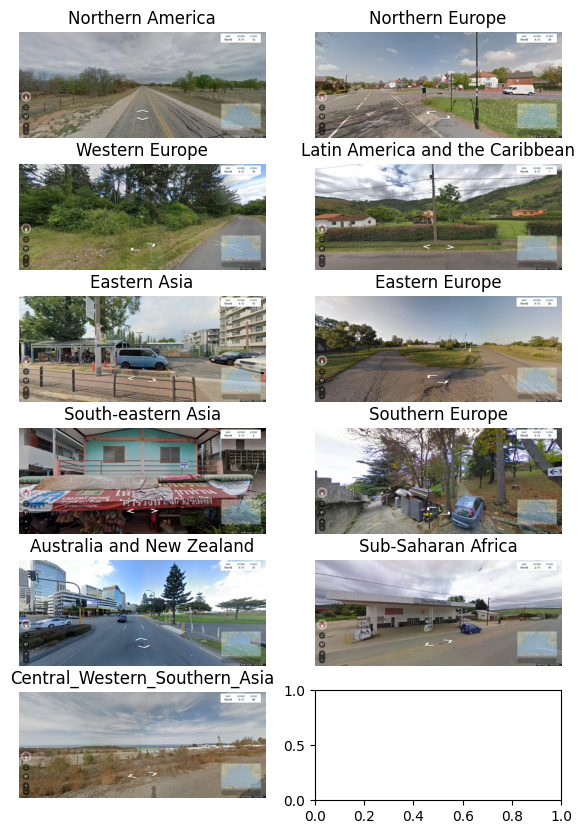

In [171]:
import cv2

fig,axs = plt.subplots(6,2,figsize=(7,10))
for i, (label, img_list) in enumerate(label_img.items()):
    # Randomly sample image
    rand_path = np.random.choice(img_list)
    rand_pic = cv2.imread(rand_path)
    rand_pic = cv2.cvtColor(rand_pic, cv2.COLOR_BGR2RGB) # Converting back to correct color format
    axs[i//2,i%2].imshow(rand_pic)
    axs[i//2,i%2].axis('off')
    axs[i//2,i%2].set_title(label)

In [123]:
from tqdm import tqdm
# Check image size
from PIL import Image
lab_img_size = {}
lab_img_size_stats = {}
for i, (label, img_list) in enumerate(label_img.items()):
    lab_img_size[label] = np.empty((2,),dtype=np.int8)
    np.random.shuffle(img_list) # shuffle image list so that theres no bias with image name
    for i,fp in enumerate(img_list):
        img = Image.open(fp)
        w,h = img.size
        lab_img_size[label] = np.row_stack([lab_img_size[label],np.array([[w,h]])])
        if i>1000:
            lab_img_size[label] = lab_img_size[label][1:]
            break
    lab_img_size_stats[label] = list(np.mean(lab_img_size[label],axis=0))

In [125]:
lab_img_size_stats

{'Northern America': [1536.0, 662.0],
 'Northern Europe': [1533.9800399201597, 662.1636726546906],
 'Western Europe': [1534.9900199600797, 662.0818363273453],
 'Latin America and the Caribbean': [1533.9800399201597, 662.1636726546906],
 'Eastern Asia': [1535.4950099800399, 662.0409181636727],
 'Eastern Europe': [1534.9900199600797, 662.0818363273453],
 'South-eastern Asia': [1535.4950099800399, 662.0409181636727],
 'Southern Europe': [1534.9900199600797, 662.0818363273453],
 'Australia and New Zealand': [1534.9900199600797, 662.0818363273453],
 'Sub-Saharan Africa': [1536.0, 662.0],
 'Central_Western_Asia': [1514.972602739726, 652.945205479452],
 'Southern Asia': [1532.0841836734694, 660.3137755102041]}